# TIA125 - Assignment

## Description

This part contains explonations regarding the columns in the data set
```
cohort
degree-seeking cohort type 
    ('4y bach' = Bachelor's/equivalent-seeking cohort at 4-year institutions; 
    '4y other' = Students seeking another type of degree or certificate at a 4-year institution; 
    '2y all' = Degree-seeking students at 2-year institutions)

race/ethnicity of students 
    ('X' = all students; 
    'Ai' = American Indian; 
    'A' = Asian; 
    'B' = Black; 
    'H' = Hispanic; 
    'W' = White)

grad_100: finnishing in timeframe of the programme
grad_100_rate: same as above in procent

grad_150: 1.5x time study speed
grad_150_rate: same as above in procent

grad_cohort: 
    Number of first-time, 
    full-time, 
    degree-seeking students in the cohort being tracked, 
    minus any exclusions
```

## Data processing

### Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/utility/")
from utility import plot_settings
from utility import visualization
from utility import data_base as data

### Data cleaning

In [5]:
df_raw = data.read_csv('../data/cc_institution_grads.csv')
print(f'Raw data file: {len(df_raw)}')
df_drop_na = df_raw.dropna()
print(f"rows after droppped Nan: {len(df_drop_na)}")
df = df_drop_na.copy()

Raw data file: 1302102
rows after droppped Nan: 332061


In [6]:
df_raw.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [7]:
df.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
18,100760,2012,B,X,2y all,594.0,40.0,87.0,6.7,14.6
36,100760,2013,B,X,2y all,594.0,46.0,54.0,7.7,9.1
54,101028,2011,B,X,2y all,261.0,25.0,42.0,9.6,16.1
72,101028,2012,B,X,2y all,281.0,41.0,41.0,14.6,14.6


In [8]:
df_clean = df[['unitid', 'year', 'gender', 'race', 'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].copy()

In [9]:
df_clean.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,73.0,105.0,16.4,23.5
18,100760,2012,B,X,40.0,87.0,6.7,14.6
36,100760,2013,B,X,46.0,54.0,7.7,9.1
54,101028,2011,B,X,25.0,42.0,9.6,16.1
72,101028,2012,B,X,41.0,41.0,14.6,14.6


Looking at the unique attributes for the categorical data

In [10]:
print(df['year'].unique())
print(df['gender'].unique())
print(df['race'].unique())

[2011 2012 2013 2010 2009 2008 2007 2006 2005 2004 2003 2002]
['B' 'M' 'F']
['X' 'W' 'B' 'H' 'Ai' 'A']


## Plotting the data

### Gender and Race distribution

B: peoples that are not telling there gender

F: Females

M: Males

---

Races explonation:
- A: Asian
- Ai: American Indian
- B: Black
- H: Hispanic
- W: White
- X: All students

<AxesSubplot:title={'center':'Race distribution'}, xlabel='gender'>

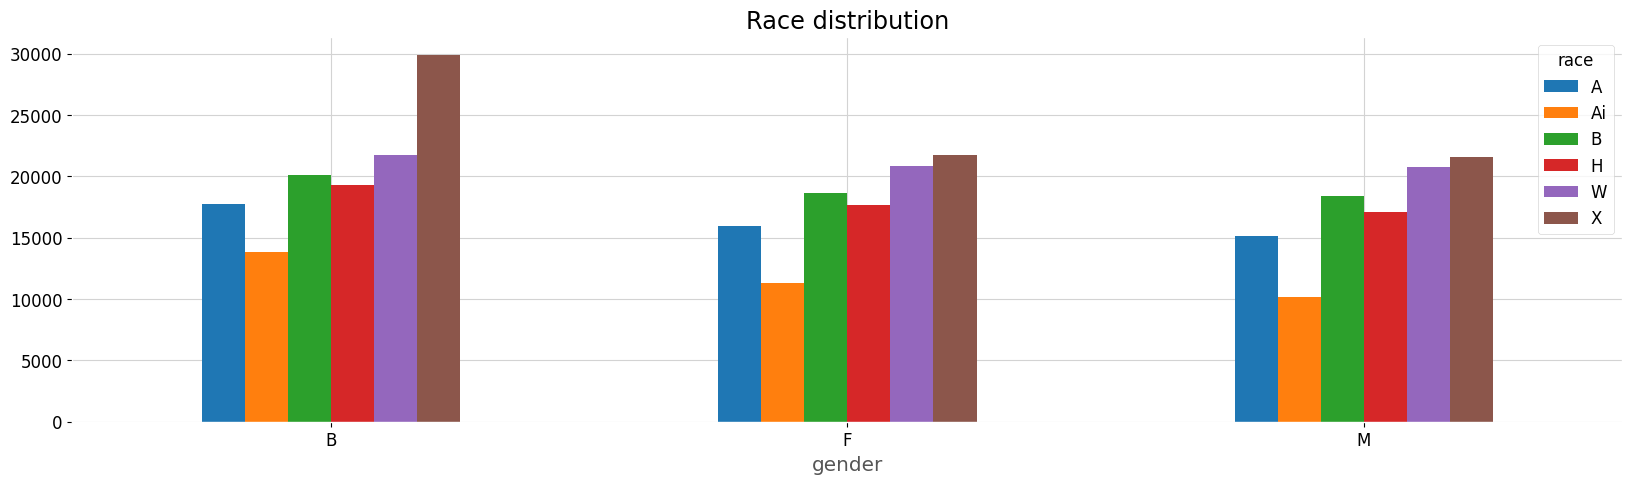

In [11]:
gender_column = df_clean['race']
df_clean.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution', rot=0)

### Education with 100 and 150 finnishing rate for year 2013

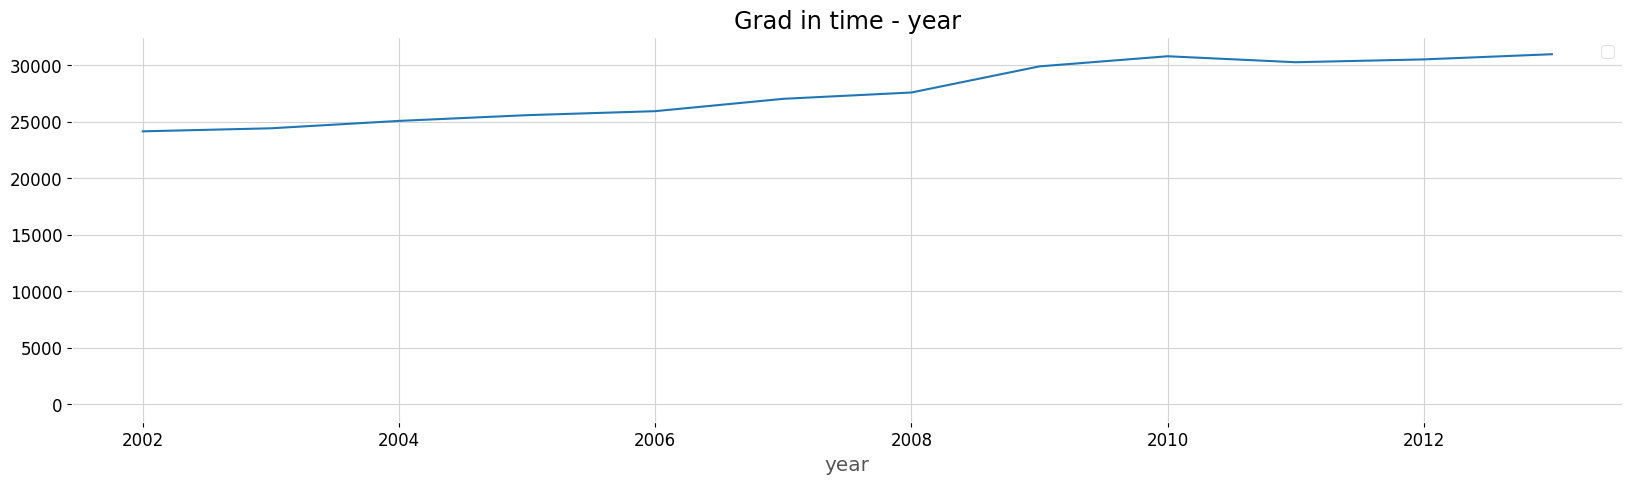

In [33]:
fig, ax = plt.subplots()
col = df_clean['grad_100'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='Grad in time - year', ax=ax)
ax.legend([])

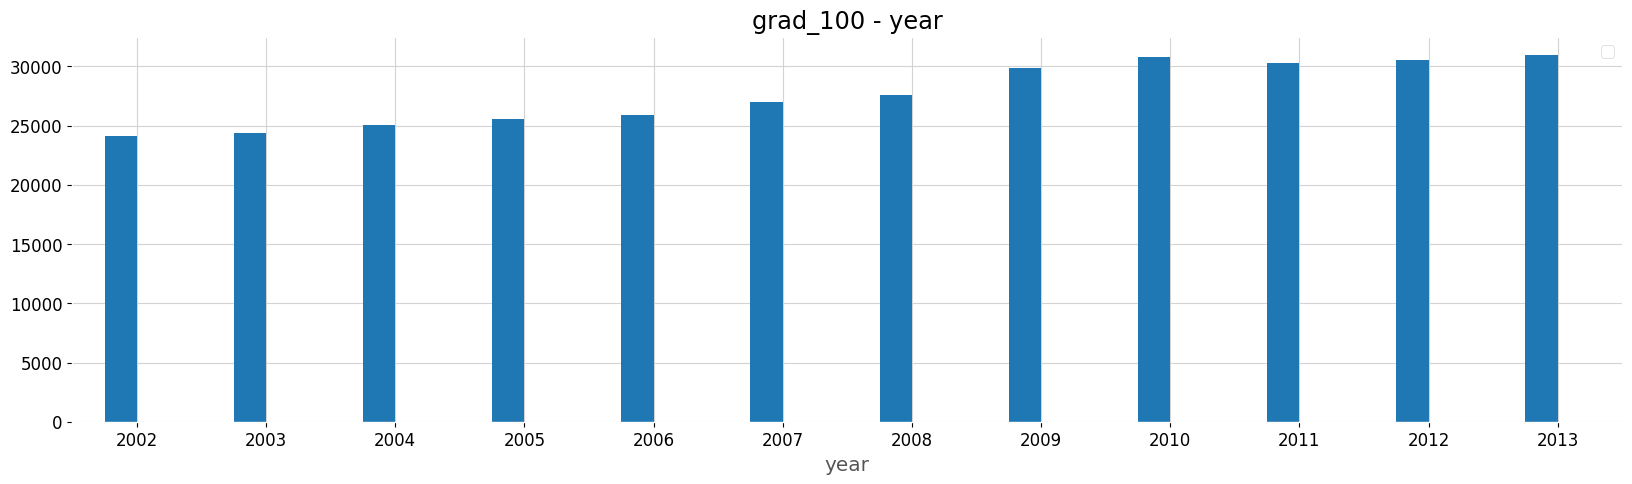

In [32]:
fig, ax = plt.subplots()
col = df_clean['grad_100'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='grad_100 - year', ax=ax, rot=0)
ax.legend([])

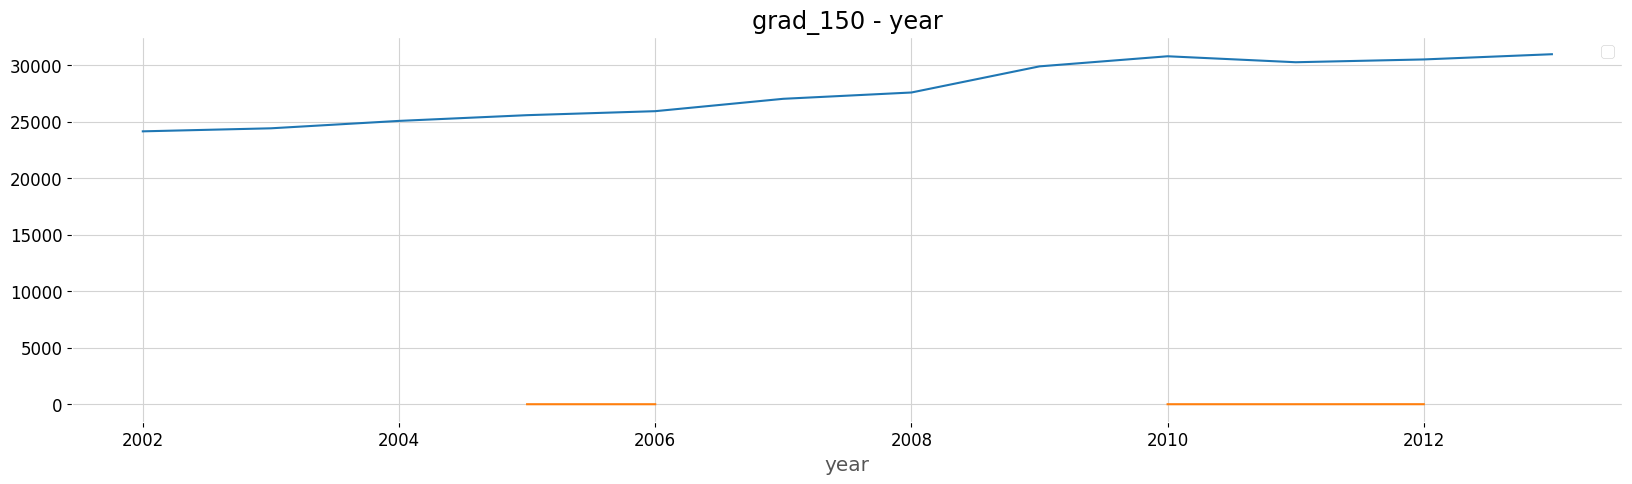

In [31]:
fig, ax = plt.subplots()
col = df_clean['grad_150'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='grad_150 - year', ax=ax)
ax.legend([])

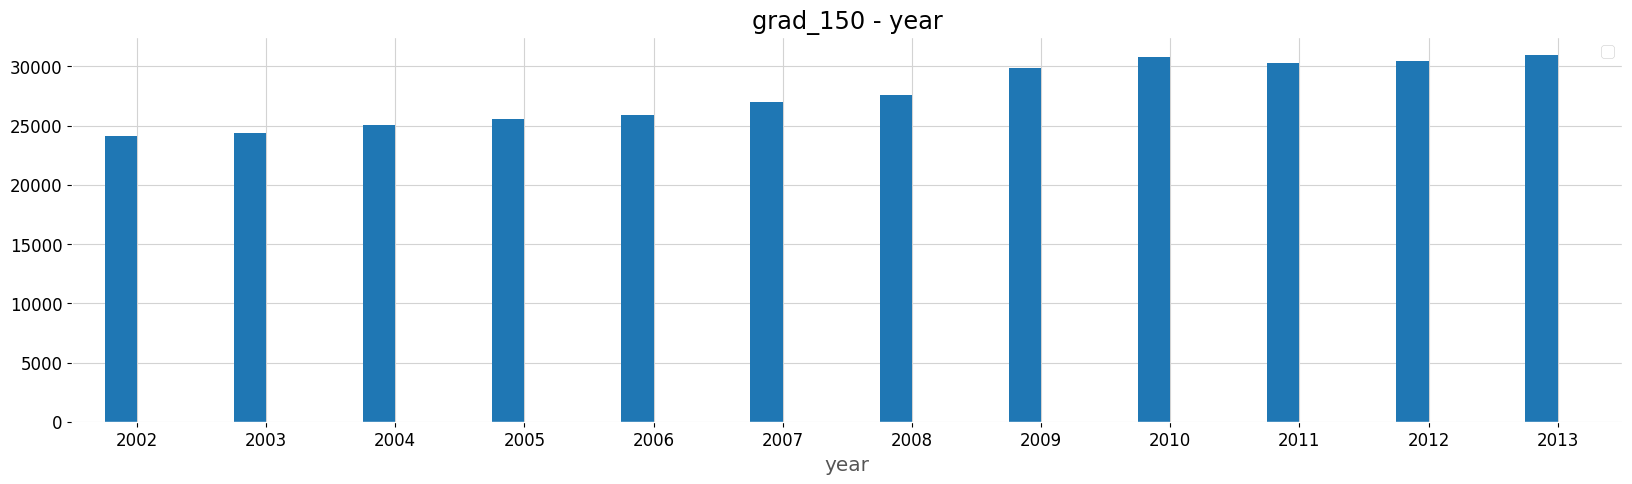

In [30]:
fig, ax = plt.subplots()
col = df_clean['grad_150'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='grad_150 - year', ax=ax, rot=0)
ax.legend([])

### grade 100 for races year 2002

In [34]:
df_2002 = df_clean[df_clean['year'] == 2002]
df_2002.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
607850,100858,2002,B,X,1321.0,2219.0,40.2,67.5
607851,101073,2002,B,X,0.0,0.0,0.0,0.0
607854,102049,2002,B,X,329.0,435.0,50.9,67.3
607855,102261,2002,B,X,12.0,15.0,63.2,78.9
607856,102298,2002,B,X,38.0,65.0,31.1,53.3
